In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pyroomacoustics as pra


from pyroomacoustics import all_combinations, dB
from pyroomacoustics.directivities import cardioid_func
from pyroomacoustics.doa import spher2cart

[1.000000e+00 0.000000e+00 6.123234e-17]
(361,)


/home/dicarlod/anaconda3/envs/steer_env/lib/python3.10/site-packages/pyroomacoustics/utilities.py:325: RuntimeWarning: divide by zero encountered in log10
  return 20 * np.log10(np.abs(signal))


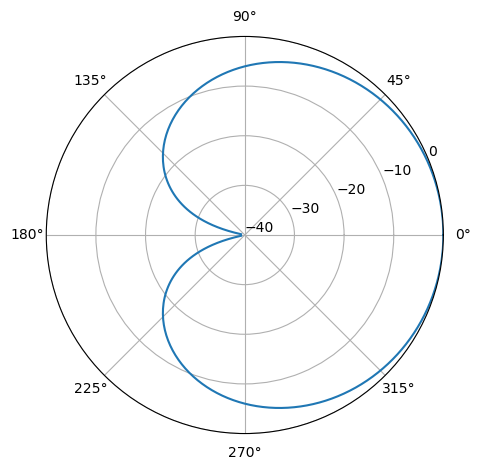

In [3]:
azimuth = np.radians(np.linspace(start=0, stop=360, num=361, endpoint=True))
colatitude = np.radians(np.linspace(start=0, stop=180, num=180, endpoint=True))
lower_gain = -40

""" 2D """
# get cartesian coordinates
cart = spher2cart(azimuth=azimuth)
direction = spher2cart(azimuth=0, degrees=True)

# compute response
resp = cardioid_func(x=cart, direction=direction, coef=0.5, magnitude=True)
print(resp.shape)

resp_db = dB(np.array(resp))

# plot
plt.figure()
plt.polar(azimuth, resp_db)
plt.ylim([lower_gain, 0])
ax = plt.gca()
ax.yaxis.set_ticks(np.arange(start=lower_gain, stop=5, step=10))
plt.tight_layout()

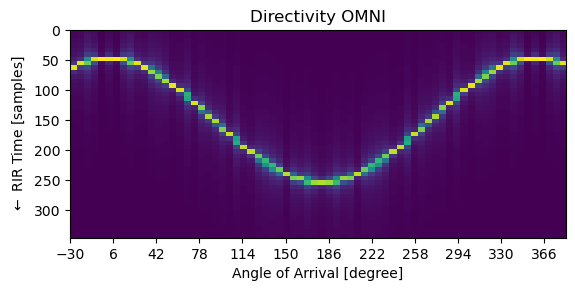

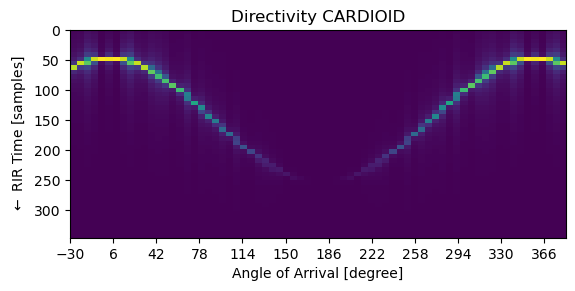

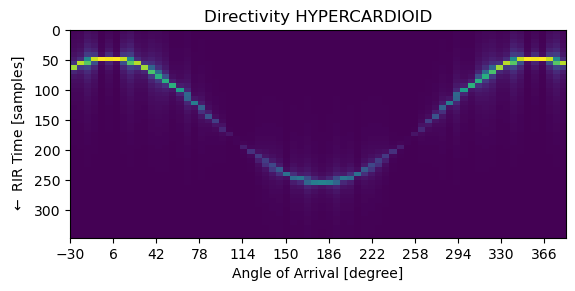

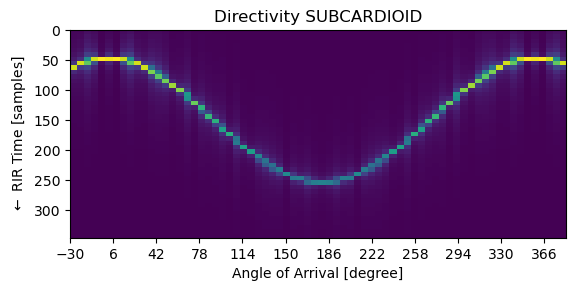

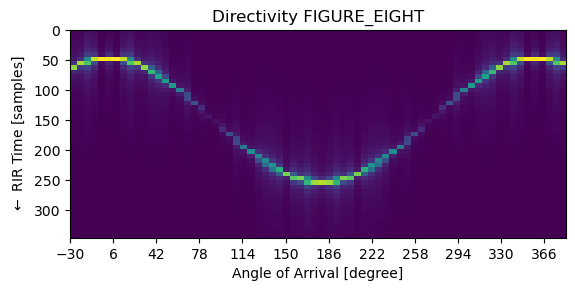

In [91]:
from pyroomacoustics.directivities import (
    CardioidFamily,
    DirectionVector,
    DirectivityPattern,
)

three_dim = True  # 2D or 3D

room_dim = [8, 8]
bar_pos = np.array([3.5, 3.5])
colatitude = None


for directivity in [DirectivityPattern.OMNI, DirectivityPattern.CARDIOID, DirectivityPattern.HYPERCARDIOID, DirectivityPattern.SUBCARDIOID, DirectivityPattern.FIGURE_EIGHT]:

    L = 500
    rirs = []
    azimuths = range(-30,390,6)
    for az in azimuths:

        source_loc = np.array([2*np.cos(np.deg2rad(az)), 2*np.sin(np.deg2rad(az))])
        source_loc = source_loc + bar_pos
        
        mic_pos = np.array([0.10*np.cos(np.deg2rad(0)), 0.10*np.sin(np.deg2rad(0))])
        mic_pos = mic_pos + bar_pos
        
        # make a room
        room = pra.ShoeBox(p=room_dim, max_order=0, fs=48000)

        # add source
        room.add_source(source_loc, signal=np.array([1,0,0,0,0]))

        # add circular microphone array
        mic_dir = directivity
        mic_dir = CardioidFamily(
            orientation=DirectionVector(azimuth=0, colatitude=None, degrees=True),
            pattern_enum=mic_dir,
        )
        # mic_dir = None
        room.add_microphone(loc=mic_pos, directivity=mic_dir)

        room.compute_rir()

        _rirs = np.array(room.rir).squeeze()
        rirs.append(_rirs)

        if _rirs.shape[0] < L:
            L = _rirs.shape[0]


    to_plot = np.stack([rirs[i][300:L] for i in range(len(rirs))], axis=0).T

    plt.title(f'Directivity {directivity.name}')
    plt.imshow(np.abs(to_plot), extent=[min(azimuths),max(azimuths),L,0], aspect=0.5)
    plt.xticks(np.array(azimuths)[::6])
    plt.xlabel('Angle of Arrival [degree]')
    plt.ylabel(r'$\leftarrow$ RIR Time [samples]')
    plt.show()
    plt.close()

In [69]:
directivity = DirectivityPattern.OMNI

In [71]:
directivity.

<DirectivityPattern.OMNI: 1.0>